In [1]:
#
# hw5pr2:  digit clasification via kNN, DT, and RF
#

In [2]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)
import seaborn as sns   # yay for Seaborn!
import matplotlib.pyplot as plt

In [3]:
pd.__version__

'1.2.2'

In [4]:
# let's read in our digits data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'digits.csv'
df = pd.read_csv(filename, header=0)   # read the file w/header row #0
print(f"{filename} : file read into a pandas dataframe.")

digits.csv : file read into a pandas dataframe.


The numeral is 6

The pixels are
[[ 0  0  0 10 11  0  0  0]
 [ 0  0  9 16  6  0  0  0]
 [ 0  0 15 13  0  0  0  0]
 [ 0  0 14 10  0  0  0  0]
 [ 0  1 15 12  8  2  0  0]
 [ 0  0 12 16 16 16 10  1]
 [ 0  0  7 16 12 12 16  4]
 [ 0  0  0  9 15 12  5  0]]


<AxesSubplot:>

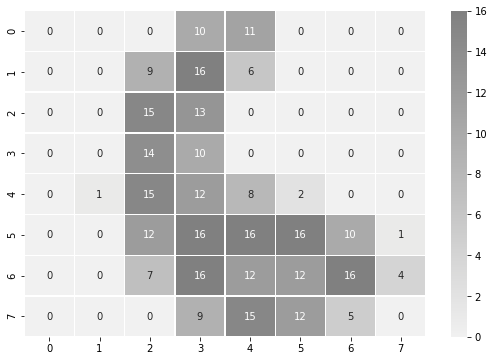

In [58]:
#
# Let's grab one row and shape it to be 8x8 (which is shape (8,8))
#
row_to_show = 42    # remember this will be different in the spreadsheet

numeral = int(round(df.iloc[row_to_show,64]))
print(f"The numeral is {numeral}\n")

pixels = df.iloc[row_to_show,0:64]  # dont want the rightmost rows
pixels = pixels.values              # converts to numpy array
pixels = pixels.astype(int)             # conver to integers for plotting
pixels = np.reshape(pixels, (8,8))  # makes 8x8
print(f"The pixels are\n{pixels}")  

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
#my_cmap = sns.dark_palette("Gray", as_cmap=True)
my_cmap = sns.light_palette("Gray", as_cmap=True)    # all seaborn palettes: medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

# plot! Change True to False to skip the numbers...  None for reddish palette
sns.heatmap(pixels, annot=True, fmt="d", linewidths=.5, ax=ax, cmap=my_cmap)

In [6]:
#
# OK!  Onward to knn for digits!   (we'll get started, based on the iris example, cell-by-cell here!)
#

In [7]:
#
# a dataframe is a "spreadsheet in Python"   (seems to have an extra column!)
#
pd.set_option('display.max_rows', 10)     # None for no limit; default: 10
# pd.set_option('display.min_rows', 150)   # min_rows is not universally supported...
# let's view it!
df

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [8]:
#
# let's look at our pandas dataframe   (Aargh: that extra column!)
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 66 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   pix0                                              1768 non-null   int64  
 1   pix1                                              1768 non-null   int64  
 2   pix2                                              1768 non-null   int64  
 3   pix3                                              1768 non-null   int64  
 4   pix4                                              1768 non-null   int64  
 5   pix5                                              1768 non-null   int64  
 6   pix6                                              1768 non-null   int64  
 7   pix7                                              1768 non-null   int64  
 8   pix8                                              1768 non-null   int64  
 9   pix9               

In [9]:
#
# let's drop that last column (dropping is usually by _name_):
#
#   if you want a list of the column names use df.columns

df_clean = df  # just for now...

coltodropname = df.columns[65]  # get column name at index 65
print(f"dropping column named {coltodropname}")
df_clean = df.drop(columns=[coltodropname])  # drop by name is typical
df_clean.info()                         # should be happier!                       # should be happier!

dropping column named excerpted from http://yann.lecun.com/exdb/mnist/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 1

In [10]:
#
# let's keep our column names in variables, for reference
#
COLUMNS = df_clean.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}")

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [11]:
#
# let's look at our cleaned-up dataframe...
#
df_clean.info()   
#
# notice that the non-null is _different_ for irisname!
df_clean   # show a table! (the problem rows are the last two...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [12]:
#
# typically, after dropping columns we don't want, 
#   we drop rows with missing data (other approaches are possible, too)
#
df_full = df_clean.dropna()   # this removes all rows with missing data ("na")
df_full.info()                # it's "full" because it has no missing data
df_full
#
# notice that _all_ of the rows now have 142 non-null items
#    also, the last row isn't real data... we'll handle it next

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [13]:
# 
# no bad rows for this dataset...
#
df_final = df_full.iloc[0:]     # no rows removed here...
print(df_final.shape)
df_final

(1768, 65)


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [14]:
#
# this needs to be fixed for digits!
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   update these for digit "species" '0', '1', '2', ...

SPECIES = [0,1,2,3,4,5,6,7,8,9]
SPECIES_INDEX = SPECIES

def convert_species(speciesname):
    """ return the species index (a unique integer/category) """
    #print(f"converting {speciesname}...")
    return SPECIES_INDEX[speciesname]

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {convert_species(name)}")

0 maps to 0
1 maps to 1
2 maps to 2
3 maps to 3
4 maps to 4
5 maps to 5
6 maps to 6
7 maps to 7
8 maps to 8
9 maps to 9


In [15]:
#
# this needs to be fixed for digits!     the column name is different... what is it!?
#

#
# we can "apply" a function to a whole column
#   it may give a warning; here, this is ok ...
#

df_final['actual_digit'] = df_final['actual_digit'].apply(convert_species)

# Don't run this twice: the data will be different the second time!
#   (In reality, feel free to go back and re-run cells to re-establish things... :-)
#    Don't worry about the (possible)  "SettingWithCopyWarning" here...

In [16]:
#
# let's see it!  (this is safe to run many times...)
#
df_final         # print(df_final.to_string())  # for _all_ rows...

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [17]:
#
# let's convert our dataframe to a numpy array, named A
#    Our ML library, scikit-learn operates entirely on numpy arrays.
#
A = df_final.values    # .values gets the numpy array
print(A)

[[ 0  0  9 ...  1  0  8]
 [ 0  0 11 ...  0  0  9]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  8]
 [ 0  0  2 ...  0  0  9]
 [ 0  0 10 ...  1  0  8]]


In [18]:
#
# let's make sure it's all floating-point, so we can multiply and divide
#
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)

[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [19]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 65 cols


In [20]:
#
# this needs to be fixed for digits!     It's a great way to see the data (also, plotting digits is above...)
#

# let's use all of our variables, to reinforce names and access...

# choose a row index, n:
n = 132
print(f"digit #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    if colname != 'actual_digit':
        print(f"  Its {colname} is {A[n][i]}")
    else:
        species_num = int(A[n][i])
        species = SPECIES[species_num]
        print(f"  Its {colname} is {species} ({species_num})")

digit #132 is [ 0.  0.  2. 13.  6.  0.  0.  0.  0.  0.  4. 16. 15.  5.  0.  0.  0.  0.
  1. 15. 12. 15.  0.  0.  0.  0.  0. 10. 16. 16.  1.  0.  0.  0.  0.  0.
  2. 16.  2.  0.  0.  0.  0.  0.  0. 15.  5.  0.  0.  0.  4.  4.  6. 16.
  3.  0.  0.  0.  2. 14. 16. 10.  0.  0.  9.]
  Its pix0 is 0.0
  Its pix1 is 0.0
  Its pix2 is 2.0
  Its pix3 is 13.0
  Its pix4 is 6.0
  Its pix5 is 0.0
  Its pix6 is 0.0
  Its pix7 is 0.0
  Its pix8 is 0.0
  Its pix9 is 0.0
  Its pix10 is 4.0
  Its pix11 is 16.0
  Its pix12 is 15.0
  Its pix13 is 5.0
  Its pix14 is 0.0
  Its pix15 is 0.0
  Its pix16 is 0.0
  Its pix17 is 0.0
  Its pix18 is 1.0
  Its pix19 is 15.0
  Its pix20 is 12.0
  Its pix21 is 15.0
  Its pix22 is 0.0
  Its pix23 is 0.0
  Its pix24 is 0.0
  Its pix25 is 0.0
  Its pix26 is 0.0
  Its pix27 is 10.0
  Its pix28 is 16.0
  Its pix29 is 16.0
  Its pix30 is 1.0
  Its pix31 is 0.0
  Its pix32 is 0.0
  Its pix33 is 0.0
  Its pix34 is 0.0
  Its pix35 is 0.0
  Its pix36 is 2.0
  Its pix37 is 16.0

In [21]:
#
# we could write-our-own nearest neighbor, but we don't have to! 
#
# Let's "library"! After all,
#
#     the representation and storage for the trees is a big task
#     we want an already-debugged algorithm!
#     we want to ask q'ns about irises and how "classifiable" they are, 
#        rather than questions about implementation (at least for this moment...)
#

In [22]:
print("+++ Start of data definitions +++\n")

X_all = A[:,0:64].copy()  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,64].copy()    # y (labels) ... is all rows, column 4 only

print(f"X_all (just features) is \n {X_all}")
print(f"y_all (just labels)   is \n {y_all}") 


#
# probably no reweighting needed for digits...
# we can re-weight different features here...
#
COL_WEIGHT = { }             # could be called Feature weight...
for colname in COLUMNS[:64]:
    COL_WEIGHT[colname] = 1.0 # set to 1.0

for colname in COL_WEIGHT:
    i = COL_INDEX[colname]    # get the column index, i, of the colname
    weight = COL_WEIGHT[colname]  # from the dictionary above
    print("Weighting", colname, "by", weight)   
    # weighting == "multiplying"
    X_all[:,i] *= weight   # multiply by the weight to give this column ("feature")

+++ Start of data definitions +++

X_all (just features) is 
 [[ 0.  0.  9. ... 11.  1.  0.]
 [ 0.  0. 11. ...  3.  0.  0.]
 [ 0.  0.  1. ...  3.  0.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y_all (just labels)   is 
 [8. 9. 0. ... 8. 9. 8.]
Weighting pix0 by 1.0
Weighting pix1 by 1.0
Weighting pix2 by 1.0
Weighting pix3 by 1.0
Weighting pix4 by 1.0
Weighting pix5 by 1.0
Weighting pix6 by 1.0
Weighting pix7 by 1.0
Weighting pix8 by 1.0
Weighting pix9 by 1.0
Weighting pix10 by 1.0
Weighting pix11 by 1.0
Weighting pix12 by 1.0
Weighting pix13 by 1.0
Weighting pix14 by 1.0
Weighting pix15 by 1.0
Weighting pix16 by 1.0
Weighting pix17 by 1.0
Weighting pix18 by 1.0
Weighting pix19 by 1.0
Weighting pix20 by 1.0
Weighting pix21 by 1.0
Weighting pix22 by 1.0
Weighting pix23 by 1.0
Weighting pix24 by 1.0
Weighting pix25 by 1.0
Weighting pix26 by 1.0
Weighting pix27 by 1.0
Weighting pix28 by 1.0
Weighting pix29 by 1.0
Weighting pix30

In [23]:
#
# we scramble the data, to give a different TRAIN/TEST split each time...
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_labeled = X_all[indices]              # we apply the _same_ permutation to each!
y_labeled = y_all[indices]              # again...
print(X_labeled)
print(y_labeled)

[[ 0.  0.  0. ...  7.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0. 15. ...  0.  0.  0.]
 ...
 [ 0.  2. 15. ... 12.  7.  0.]
 [ 0.  0.  9. ... 15.  4.  0.]
 [ 0.  0.  3. ... 15.  0.  0.]]
[4. 4. 5. ... 2. 5. 9.]


In [24]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#
NUM_ROWS = X_labeled.shape[0]     # the number of labeled rows
TEST_PERCENT = 0.20
TEST_SIZE = int(TEST_PERCENT*NUM_ROWS)   # no harm in rounding down

X_test = X_labeled[:TEST_SIZE]    # first section are for testing
y_test = y_labeled[:TEST_SIZE]

X_train = X_labeled[TEST_SIZE:]   # all the rest are for training
y_train = y_labeled[TEST_SIZE:]

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows" )

training with 1415 rows;  testing with 353 rows


In [25]:
print(f"y_test is {y_test}")
print(f"y_train is {y_train}")   # to "get a visual" on these...
# print(X_test)
# print(X_train)

y_test is [4. 4. 5. 9. 9. 0. 1. 2. 3. 0. 2. 4. 2. 7. 5. 3. 9. 6. 6. 2. 2. 0. 5. 7.
 7. 6. 6. 1. 2. 4. 3. 9. 8. 0. 8. 6. 9. 5. 4. 1. 9. 4. 6. 0. 7. 3. 3. 4.
 5. 7. 6. 6. 1. 6. 8. 0. 7. 8. 3. 6. 7. 4. 8. 3. 5. 2. 9. 4. 5. 3. 6. 5.
 7. 7. 2. 5. 1. 6. 4. 1. 1. 2. 3. 4. 9. 5. 4. 4. 5. 8. 4. 9. 3. 3. 8. 1.
 4. 7. 0. 3. 9. 0. 7. 8. 1. 3. 9. 8. 5. 7. 9. 8. 3. 3. 3. 9. 7. 8. 6. 4.
 2. 5. 0. 2. 6. 5. 2. 5. 6. 6. 8. 5. 1. 3. 8. 1. 3. 5. 8. 8. 4. 1. 0. 6.
 3. 4. 5. 8. 5. 3. 7. 1. 3. 1. 4. 2. 4. 8. 1. 4. 9. 8. 2. 1. 7. 1. 3. 8.
 1. 1. 5. 7. 5. 2. 7. 9. 6. 1. 0. 2. 8. 6. 1. 0. 4. 0. 1. 1. 1. 0. 6. 0.
 1. 4. 0. 0. 6. 2. 6. 1. 2. 8. 4. 0. 6. 6. 4. 6. 0. 2. 2. 1. 4. 1. 9. 7.
 2. 8. 0. 7. 1. 5. 9. 2. 3. 3. 4. 4. 7. 3. 5. 3. 1. 5. 5. 8. 7. 0. 2. 6.
 3. 8. 3. 1. 5. 3. 0. 1. 0. 6. 7. 0. 0. 1. 7. 4. 5. 2. 6. 1. 2. 9. 0. 0.
 4. 1. 0. 0. 3. 1. 2. 1. 4. 6. 1. 8. 4. 9. 8. 1. 9. 1. 2. 1. 6. 4. 7. 8.
 5. 2. 2. 0. 7. 3. 2. 9. 7. 9. 0. 7. 2. 1. 5. 1. 4. 2. 0. 3. 1. 9. 3. 0.
 4. 0. 3. 1. 8. 3. 9. 2. 6. 2. 0. 5. 7. 8

In [26]:
#
# +++ This is a "Model-building and Model-training Cell"
#       
# Create a kNN model and train it! 
#
from sklearn.neighbors import KNeighborsClassifier

k = 84   # we don't know what k to use, so we guess!  (this will _not_ be the best value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN

# we train the model (it's one line!)
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with k =", k) 

Created and trained a knn classifier with k = 84


In [27]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = knn_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [4. 4. 5. 9. 9. 0. 1. 2. 3. 0. 2. 4. 2. 7. 5. 3. 9. 6. 6. 8. 2. 0. 5. 7.
 7. 6. 6. 1. 2. 4. 3. 9. 8. 0. 8. 6. 9. 5. 1. 1. 9. 4. 6. 0. 7. 8. 3. 4.
 5. 7. 6. 6. 1. 6. 8. 0. 7. 8. 3. 6. 7. 4. 8. 3. 5. 1. 9. 4. 5. 3. 6. 5.
 7. 7. 2. 9. 1. 6. 4. 1. 1. 2. 3. 4. 9. 5. 4. 4. 5. 8. 4. 9. 3. 3. 1. 1.
 4. 7. 0. 3. 9. 0. 7. 1. 1. 3. 9. 8. 5. 7. 9. 8. 8. 3. 3. 9. 7. 8. 6. 4.
 2. 5. 0. 2. 6. 5. 2. 5. 6. 6. 8. 5. 1. 3. 8. 2. 3. 5. 8. 8. 4. 1. 0. 6.
 3. 4. 5. 5. 5. 7. 7. 1. 3. 1. 4. 2. 4. 8. 1. 4. 9. 8. 0. 1. 7. 1. 3. 8.
 1. 1. 5. 7. 5. 2. 7. 9. 6. 1. 0. 2. 8. 6. 1. 0. 7. 0. 1. 1. 1. 0. 6. 0.
 1. 4. 0. 0. 6. 2. 6. 1. 2. 3. 4. 0. 6. 6. 7. 6. 0. 2. 2. 1. 4. 6. 9. 7.
 2. 8. 0. 7. 2. 5. 7. 2. 3. 3. 4. 4. 7. 3. 5. 3. 1. 5. 5. 8. 7. 0. 2. 6.
 3. 8. 3. 1. 5. 3. 0. 1. 0. 6. 7. 0. 0. 1. 7. 4. 5. 2. 6. 1. 2. 9. 0. 0.
 4. 1. 0. 0. 3. 1. 2. 9. 4. 6. 1. 8. 4. 9. 8. 2. 9. 1. 2. 1. 6. 4. 7. 8.
 5. 2. 2. 4. 7. 3. 2. 9. 7. 8. 0. 7. 8. 2. 5. 1. 4. 2. 0. 3. 1. 9. 3. 0.
 4. 0. 3. 1. 5. 3. 9. 2. 6. 2. 0.

In [28]:
#
# Let's print these more helpfully, in a vertical table - there may be some adjustments here...
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12d} {SPECIES[a]:<12d}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

#
# let's try it out!
#

compare_labels(predicted_labels,actual_labels)

row   0 :            4 4              
row   1 :            4 4              
row   2 :            5 5              
row   3 :            9 9              
row   4 :            9 9              
row   5 :            0 0              
row   6 :            1 1              
row   7 :            2 2              
row   8 :            3 3              
row   9 :            0 0              
row  10 :            2 2              
row  11 :            4 4              
row  12 :            2 2              
row  13 :            7 7              
row  14 :            5 5              
row  15 :            3 3              
row  16 :            9 9              
row  17 :            6 6              
row  18 :            6 6              
row  19 :            8 2              incorrect
row  20 :            2 2              
row  21 :            0 0              
row  22 :            5 5              
row  23 :            7 7              
row  24 :            7 7              
row  25 :       

324

In [29]:
#
# Except, we didn't really explore whether this was the BEST model we could build!
#
#
# We used k = 84  (a neighborhood size of 84 flowers)
# In a dataset of only 140ish flowers, with three species, this seems like a bad idea!
#
# Perhaps we should try ALL the neighborhood sizes in their own TRAIN/TEST split
# and see which neighborhood size works the best, for irises, at least...
#

#
# to do this, we use "cross validation"
#

best_acc = 0
best_k = 0

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#
for k in range(1,85):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build knn_model for every k!
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # 5 means 80/20 split
    # print(cv_scores)  # just to see the five scores... 
    average_cv_accuracy = cv_scores.mean()  # mean() is numpy's built-in average function 
    print(f"k: {k:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    if average_cv_accuracy > best_acc:
        best_acc = average_cv_accuracy
        best_k = k
        print(f"Found a better k: {k}")

    
    
# assign best value of k to best_k -- done, above!
# you'll need to use the loop above to find and remember the real best_k

print(f"best_k = {best_k}   yields the highest average cv accuracy.")  # print the best one

k:  1  cv accuracy:  0.9859
Found a better k: 1
k:  2  cv accuracy:  0.9809
k:  3  cv accuracy:  0.9837
k:  4  cv accuracy:  0.9809
k:  5  cv accuracy:  0.9823
k:  6  cv accuracy:  0.9795
k:  7  cv accuracy:  0.9802
k:  8  cv accuracy:  0.9781
k:  9  cv accuracy:  0.9781
k: 10  cv accuracy:  0.9774
k: 11  cv accuracy:  0.9788
k: 12  cv accuracy:  0.9767
k: 13  cv accuracy:  0.9767
k: 14  cv accuracy:  0.9739
k: 15  cv accuracy:  0.9703
k: 16  cv accuracy:  0.9703
k: 17  cv accuracy:  0.9682
k: 18  cv accuracy:  0.9689
k: 19  cv accuracy:  0.9689
k: 20  cv accuracy:  0.9675
k: 21  cv accuracy:  0.9682
k: 22  cv accuracy:  0.9675
k: 23  cv accuracy:  0.9682
k: 24  cv accuracy:  0.9661
k: 25  cv accuracy:  0.9654
k: 26  cv accuracy:  0.9640
k: 27  cv accuracy:  0.9647
k: 28  cv accuracy:  0.9633
k: 29  cv accuracy:  0.9625
k: 30  cv accuracy:  0.9604
k: 31  cv accuracy:  0.9590
k: 32  cv accuracy:  0.9597
k: 33  cv accuracy:  0.9548
k: 34  cv accuracy:  0.9562
k: 35  cv accuracy:  0.9527


In [30]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# Now, using best_k instead of the original, randomly-guessed value    How does it do?!
#
from sklearn.neighbors import KNeighborsClassifier
knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k

# we train the model (one line!)
knn_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}")  

Created + trained a knn classifier, now tuned with a (best) k of 1


In [31]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = knn_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()
# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [4. 4. 5. 9. 9. 0. 1. 2. 3. 0. 2. 4. 2. 7. 5. 3. 9. 6. 6. 2. 2. 0. 5. 7.
 7. 6. 6. 1. 2. 4. 3. 9. 8. 0. 8. 6. 9. 5. 4. 1. 9. 4. 6. 0. 7. 3. 3. 4.
 5. 7. 6. 6. 1. 6. 8. 0. 7. 8. 3. 6. 7. 4. 8. 3. 5. 2. 9. 4. 5. 3. 6. 5.
 7. 7. 2. 5. 1. 6. 4. 1. 1. 2. 3. 4. 9. 5. 4. 4. 5. 8. 4. 9. 3. 3. 8. 1.
 4. 7. 0. 3. 9. 0. 9. 8. 1. 3. 9. 8. 5. 7. 9. 8. 3. 3. 3. 9. 7. 8. 6. 4.
 2. 5. 0. 2. 6. 5. 2. 5. 6. 6. 8. 5. 1. 3. 8. 1. 3. 5. 8. 8. 4. 1. 0. 6.
 3. 4. 5. 8. 5. 3. 7. 1. 3. 1. 4. 2. 4. 8. 1. 4. 9. 8. 2. 1. 7. 1. 3. 8.
 1. 1. 5. 7. 5. 2. 7. 9. 6. 1. 0. 2. 8. 6. 1. 0. 4. 0. 1. 1. 1. 0. 6. 0.
 1. 4. 0. 0. 6. 2. 6. 1. 2. 3. 4. 0. 6. 6. 4. 6. 0. 2. 2. 1. 4. 1. 5. 7.
 2. 8. 0. 7. 1. 5. 9. 2. 3. 3. 4. 4. 7. 3. 5. 3. 1. 5. 5. 8. 7. 0. 2. 6.
 3. 8. 3. 1. 5. 3. 0. 1. 0. 6. 7. 0. 0. 1. 7. 4. 5. 2. 6. 1. 2. 9. 0. 0.
 4. 1. 0. 0. 3. 1. 2. 1. 4. 6. 1. 8. 4. 9. 8. 1. 9. 1. 2. 1. 6. 4. 7. 8.
 5. 2. 2. 0. 7. 3. 2. 9. 7. 9. 0. 7. 2. 1. 5. 1. 4. 2. 0. 3. 1. 9. 3. 0.
 4. 0. 3. 1. 1. 3. 9. 2. 6. 2. 0.

348

In [32]:
#
# Ok!  We have tuned knn to use the "best" value of k...
#
# And, we should really use ALL available data to train our final predictive model:
#

knn_model_final = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k
knn_model_final.fit(X_all, y_all)                              # yay!  trained!
print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}") 

Created + trained a 'final' knn classifier, with a (best) k of 1


In [33]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = knn_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
    return f"{name} ({predicted_species})"

# we don't need to worry about trying this on unseen data, for now...

In [34]:
#
# OK!  Onward to DT + RF for digits!   (use the iris example, cell-by-cell) here!
#

In [35]:
#
# +++ This is a "Model-building and Model-training Cell"
#       
# Create a DT model and train it! 
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so we guess...
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 1


In [36]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [7. 7. 7. 7. 7. 0. 7. 7. 7. 0. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 0. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 0. 7. 7. 7. 0. 7. 7. 0. 7. 7. 0. 7. 7. 7. 7.
 7. 7. 0. 7. 7. 7. 7. 0. 7. 7. 7. 7. 7. 7. 7. 7. 0. 7. 0. 7. 0. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 0. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 0. 7. 0. 0. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 0. 7. 7. 7. 7.
 7. 7. 0. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 0. 7.
 7. 7. 7. 7. 0. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 0. 7. 7. 7. 7. 7.
 7. 7. 0. 7. 7. 7. 7. 0. 7. 7. 0. 7. 7. 7. 7. 0. 7. 0. 7. 7. 7. 0. 7. 0.
 7. 7. 0. 0. 7. 7. 7. 7. 7. 7. 7. 0. 7. 7. 7. 7. 0. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 0. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 0. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 0. 7. 7. 0. 0. 7. 7. 0. 7. 7. 7. 7. 7. 7. 0. 0.
 7. 7. 0. 0. 7. 7. 7. 7. 7. 7. 7. 7. 7. 0. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 0. 7. 7. 7. 7. 7. 7. 7. 0. 7. 7. 0. 7. 0.
 7. 0. 7. 7. 0. 7. 0. 7. 0. 7. 0.

67

In [37]:
#
# let's see the tree!   Paste the tree's source into     http://viz-js.com/
#

SPECIES_STRINGS = [ str(sp) for sp in SPECIES ]

filename = 'tree_depth_' + str(best_depth) + '.gv'  # preferred over .dot

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES_STRINGS,      # good to have   
                            leaves_parallel=True )    # lots of options!

print(f"# file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)
    
#
# Lab task:  build three trees at depths 1, 2, and 3 (submit with the notebooks!)
#

# file tree_depth_1.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black"] ;
graph [ranksep=equally, splines=polyline] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1415\nvalue = [136, 130, 139, 142, 141, 147, 145, 145, 140, 150]\nclass = 9", fillcolor="#ffffff"] ;
1 [label="gini = 0.538\nsamples = 210\nvalue = [134, 0, 3, 1, 4, 19, 3, 0, 1, 45]\nclass = 0", fillcolor="#f1bb94"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.888\nsamples = 1205\nvalue = [2, 130, 136, 141, 137, 128, 142, 145, 139, 105]\nclass = 7", fillcolor="#fffeff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


In [38]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We used a depth of 1    (only 1 split) 
# There's no way to model three species with only 1 split!
#
# So, we try several depths...
# Here, the tradeoff is not so much "more accurate" 
#       + deeper always has the potential to be more accurate
#       + at the risk of overfitting the training data!
#
# Rather it's the underfitting(bias)/overfitting(variance) tradeoff
#

In [39]:
#
# So, to compare different depths, let's use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 0
best_acc = 0

for d in range(1,6):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # if we want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")   
    
    if average_cv_accuracy > best_acc:
        best_acc = average_cv_accuracy
        best_d = d
        print(f"found a better depth: {best_d}")
        
    
# assign best value of d (from above) to best_depth:
best_depth = best_d 
print()
print(f"best_depth = {best_depth} is our choice for underfitting/overfitting balance.")  

depth:  1  cv accuracy:  0.1972
found a better depth: 1
depth:  2  cv accuracy:  0.3293
found a better depth: 2
depth:  3  cv accuracy:  0.4693
found a better depth: 3
depth:  4  cv accuracy:  0.5633
found a better depth: 4
depth:  5  cv accuracy:  0.6657
found a better depth: 5

best_depth = 5 is our choice for underfitting/overfitting balance.


In [40]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# Now, using the tuned value...
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 5


In [41]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [4. 4. 5. 3. 3. 0. 3. 8. 3. 0. 8. 4. 8. 7. 5. 3. 3. 6. 6. 8. 8. 0. 5. 8.
 7. 6. 6. 8. 2. 8. 3. 3. 8. 0. 8. 6. 3. 5. 1. 1. 9. 5. 6. 0. 7. 3. 3. 4.
 5. 1. 2. 6. 3. 6. 8. 9. 8. 1. 3. 6. 8. 4. 8. 3. 5. 8. 9. 4. 5. 3. 6. 5.
 3. 7. 2. 3. 8. 6. 4. 8. 8. 8. 3. 1. 9. 5. 1. 4. 5. 8. 4. 3. 3. 3. 8. 8.
 4. 8. 0. 3. 9. 0. 8. 3. 1. 3. 8. 8. 5. 8. 3. 8. 8. 3. 3. 9. 7. 8. 6. 4.
 8. 5. 0. 1. 6. 5. 8. 3. 6. 6. 8. 5. 1. 3. 8. 1. 3. 5. 8. 8. 7. 8. 0. 6.
 3. 4. 5. 8. 5. 8. 7. 8. 3. 8. 1. 2. 4. 8. 8. 8. 3. 8. 3. 1. 7. 3. 3. 8.
 8. 8. 5. 7. 3. 8. 7. 9. 6. 8. 0. 8. 8. 6. 2. 0. 9. 0. 8. 8. 2. 0. 6. 0.
 8. 1. 0. 0. 6. 8. 6. 8. 8. 8. 4. 0. 6. 6. 9. 6. 0. 8. 2. 8. 4. 1. 3. 7.
 2. 3. 0. 8. 1. 5. 9. 8. 3. 3. 4. 4. 8. 8. 5. 3. 8. 5. 5. 8. 9. 0. 8. 6.
 3. 3. 3. 1. 2. 3. 8. 8. 0. 6. 7. 0. 0. 8. 7. 4. 5. 7. 6. 8. 2. 3. 0. 0.
 4. 1. 0. 0. 3. 8. 8. 3. 3. 6. 8. 8. 4. 9. 3. 1. 3. 8. 8. 8. 6. 4. 9. 8.
 5. 8. 2. 8. 7. 2. 3. 3. 8. 3. 0. 8. 8. 1. 8. 8. 4. 8. 0. 3. 8. 9. 3. 0.
 4. 0. 3. 8. 0. 3. 9. 2. 6. 8. 0.

221

In [42]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth) 

Created and trained a 'final' DT classifier with max depth = 5


In [43]:
#
# feature importances can be even more "important" than predictions!
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.         0.         0.         0.00281529 0.         0.10062562
 0.0223101  0.         0.         0.         0.01061056 0.
 0.01412582 0.03378318 0.         0.         0.         0.
 0.01044967 0.02207285 0.         0.12167573 0.         0.
 0.         0.         0.         0.00207307 0.00484082 0.
 0.         0.         0.         0.16540719 0.         0.
 0.11868316 0.         0.         0.         0.         0.00105573
 0.11228146 0.08282336 0.         0.00285048 0.         0.
 0.         0.         0.         0.00298333 0.         0.01651018
 0.03789607 0.         0.         0.         0.01799117 0.
 0.09613516 0.         0.         0.        ]

Feature         pix0 has    0.00% of the decision-making importance.
Feature         pix1 has    0.00% of the decision-making importance.
Feature         pix2 has    0.00% of the decision-making importance.
Feature         pix3 has    0.28% of the decision-making importance.
Feature         pix4 has    0.00% of the decision-making import

The pixels are
[[ 0  0  0  0  0 10  2  0]
 [ 0  0  1  0  1  3  0  0]
 [ 0  0  1  2  0 12  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0 16  0  0 11  0  0  0]
 [ 0  0 11  8  0  0  0  0]
 [ 0  0  0  0  0  1  3  0]
 [ 0  0  1  0  9  0  0  0]]


<AxesSubplot:>

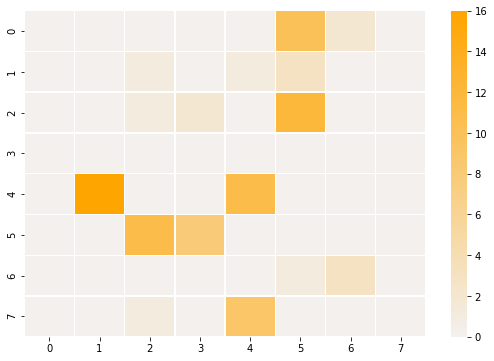

In [44]:
#
# let's build the feature-importance image!
#

pixels = IMPs*100. # we scale it up since the largest percentage is 16%
pixels = pixels.astype(int)             # conver to integers for plotting
pixels = np.reshape(pixels, (8,8))  # makes 8x8
print(f"The pixels are\n{pixels}")  

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
#my_cmap = sns.dark_palette("Gray", as_cmap=True)
my_cmap = sns.light_palette("Orange", as_cmap=True)    # all seaborn palettes: medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

# plot! Change True to False to skip the numbers...  None for reddish palette
sns.heatmap(pixels, annot=False, fmt="d", linewidths=.5, ax=ax, cmap=my_cmap)

In [45]:
#
# That's it!  Welcome to the world of Decision-Tree models!    
#

#
# But wait, there's more!  More workflows, and more trees!  Random Forests next:
#

In [46]:
#
# Random Forests!!!
#

# Lots of trees, each using a partial fraction of the data
#      that get together to vote on the correct classification...

In [47]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

best_depth = 1        # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_depth} and #trees={best_num_trees}") 

Built an RF with depth=1 and #trees=42


In [48]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [4. 4. 5. 9. 9. 0. 3. 2. 3. 0. 2. 4. 2. 7. 5. 3. 9. 6. 6. 8. 2. 0. 5. 7.
 4. 6. 6. 8. 6. 7. 3. 9. 7. 0. 8. 6. 9. 0. 6. 5. 0. 6. 6. 0. 7. 3. 3. 4.
 5. 6. 0. 6. 3. 6. 8. 0. 4. 4. 3. 6. 7. 4. 3. 3. 0. 4. 0. 4. 0. 3. 6. 5.
 9. 7. 5. 3. 2. 6. 4. 4. 7. 6. 3. 4. 0. 5. 4. 4. 5. 8. 4. 9. 3. 3. 8. 4.
 4. 7. 0. 3. 0. 0. 9. 3. 5. 3. 9. 8. 6. 7. 9. 8. 8. 3. 3. 0. 7. 6. 6. 4.
 2. 5. 0. 5. 6. 5. 2. 3. 6. 6. 8. 5. 4. 3. 8. 5. 3. 5. 9. 8. 4. 8. 0. 6.
 3. 4. 5. 3. 0. 7. 4. 6. 3. 8. 4. 5. 4. 8. 8. 4. 9. 8. 0. 5. 7. 3. 3. 8.
 2. 8. 0. 7. 3. 2. 7. 0. 6. 8. 0. 2. 7. 6. 5. 0. 7. 0. 6. 2. 5. 0. 6. 0.
 2. 6. 0. 0. 6. 2. 6. 2. 2. 6. 4. 0. 6. 6. 7. 6. 0. 2. 5. 2. 4. 6. 3. 7.
 5. 3. 0. 3. 5. 5. 7. 2. 3. 3. 4. 4. 2. 3. 5. 3. 2. 4. 6. 8. 7. 0. 2. 6.
 3. 6. 3. 4. 5. 3. 4. 6. 0. 6. 7. 0. 0. 6. 7. 0. 5. 7. 6. 2. 5. 9. 0. 0.
 4. 4. 0. 0. 3. 2. 2. 9. 4. 6. 2. 8. 4. 0. 8. 5. 9. 2. 2. 2. 6. 4. 7. 6.
 6. 2. 5. 8. 7. 3. 3. 3. 7. 9. 0. 7. 8. 2. 7. 6. 4. 2. 0. 3. 2. 0. 3. 0.
 4. 0. 3. 6. 0. 3. 0. 2. 0. 2. 0.

219

In [49]:
#
# we can get the individual trees, if we want...  Paste source into http://viz-js.com/
#
i = 0
one_rf_tree = rforest_model.estimators_[i]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{i:03d}.gv'    # .gv preferred over .dot
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES_STRINGS,      # good to have   
                            leaves_parallel=True )    # lots of options!
print(f"# file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='auto',
                       random_state=1332363467)
# file rf_tree_000.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black"] ;
graph [ranksep=equally, splines=polyline] ;
0 [label="pix33 <= 3.5\ngini = 0.899\nsamples = 917\nvalue = [142, 138, 147, 131, 132, 156, 160, 140, 124, 145]\nclass = 6", fillcolor="#fefeff"] ;
1 [label="gini = 0.877\nsamples = 664\nvalue = [11, 117, 144, 131, 7, 133, 84, 119, 123, 145]\nclass = 9", fillcolor="#ffffff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.751\nsamples = 253\nvalue = [131, 21, 3, 0, 125, 23, 76, 21, 1, 0]\nclass = 0", fillcolor="#fefcfb"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


In [50]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We used a depth of 1  and #trees of 42  
#
# So, we try several depths and # of trees
# 
# Again, the tradeoff is underfitting/overfitting...
#

In [51]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#
best_acc = 0
best_d = 0
best_ntrees = 0


for ntrees in range(50,300,100):
    for d in range(1,6):
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        # print(cv_scores)  # if we want to see the five individual scores 
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")

        if average_cv_accuracy > best_acc:
            best_acc = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees
            print(f"found a better depth: {best_d} and ntrees: {ntrees}")


# assign best values
best_depth = best_d
best_num_trees = best_ntrees
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices.")  

depth:  1 ntrees:  50 cv accuracy:  0.6947
found a better depth: 1 and ntrees: 50
depth:  2 ntrees:  50 cv accuracy:  0.8078
found a better depth: 2 and ntrees: 50
depth:  3 ntrees:  50 cv accuracy:  0.8530
found a better depth: 3 and ntrees: 50
depth:  4 ntrees:  50 cv accuracy:  0.9131
found a better depth: 4 and ntrees: 50
depth:  5 ntrees:  50 cv accuracy:  0.9371
found a better depth: 5 and ntrees: 50
depth:  1 ntrees: 150 cv accuracy:  0.7216
depth:  2 ntrees: 150 cv accuracy:  0.8021
depth:  3 ntrees: 150 cv accuracy:  0.8742
depth:  4 ntrees: 150 cv accuracy:  0.9173
depth:  5 ntrees: 150 cv accuracy:  0.9329
depth:  1 ntrees: 250 cv accuracy:  0.7378
depth:  2 ntrees: 250 cv accuracy:  0.8078
depth:  3 ntrees: 250 cv accuracy:  0.8756
depth:  4 ntrees: 250 cv accuracy:  0.9187
depth:  5 ntrees: 250 cv accuracy:  0.9406
found a better depth: 5 and ntrees: 250

best_depth: 5 and best_num_trees: 250 are our choices.


In [52]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=250


In [53]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [4. 4. 5. 9. 9. 0. 1. 2. 3. 0. 2. 4. 2. 7. 5. 3. 9. 6. 6. 2. 2. 0. 5. 7.
 7. 6. 6. 1. 2. 4. 3. 9. 8. 0. 8. 6. 9. 5. 4. 5. 9. 4. 6. 0. 7. 3. 3. 4.
 5. 7. 6. 6. 1. 6. 8. 0. 7. 8. 3. 6. 7. 4. 8. 3. 5. 2. 9. 4. 5. 3. 6. 5.
 7. 7. 2. 3. 1. 6. 4. 1. 1. 2. 3. 4. 9. 5. 4. 4. 5. 8. 4. 9. 3. 3. 8. 1.
 4. 7. 0. 3. 9. 0. 9. 9. 1. 3. 9. 8. 5. 7. 9. 8. 8. 3. 3. 9. 7. 8. 6. 4.
 2. 5. 0. 2. 6. 5. 2. 9. 6. 6. 8. 5. 4. 3. 8. 1. 3. 5. 8. 8. 4. 1. 0. 6.
 3. 4. 5. 8. 9. 8. 7. 1. 3. 1. 4. 2. 4. 8. 8. 4. 9. 8. 0. 1. 7. 1. 3. 8.
 1. 1. 5. 7. 5. 2. 7. 9. 6. 1. 0. 2. 8. 6. 1. 0. 7. 0. 1. 1. 1. 0. 6. 0.
 1. 4. 0. 0. 6. 2. 6. 1. 2. 8. 4. 0. 6. 6. 7. 6. 0. 2. 2. 1. 4. 1. 9. 7.
 2. 8. 0. 7. 1. 5. 7. 2. 3. 3. 4. 4. 7. 3. 5. 3. 1. 5. 5. 8. 7. 0. 2. 6.
 3. 8. 3. 1. 5. 3. 0. 1. 0. 6. 7. 0. 0. 1. 7. 4. 5. 2. 6. 1. 2. 9. 0. 0.
 4. 1. 0. 0. 3. 1. 2. 9. 4. 6. 1. 8. 4. 9. 8. 1. 9. 1. 2. 1. 6. 4. 7. 8.
 5. 2. 2. 4. 7. 3. 3. 9. 7. 9. 0. 7. 2. 1. 5. 8. 4. 2. 0. 3. 1. 9. 3. 0.
 4. 0. 3. 1. 5. 3. 9. 2. 6. 2. 0.

327

In [54]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=250


In [55]:
#
# feature importances can be even more "important" than predictions!
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.00000000e+00 1.46946020e-03 2.02436499e-02 5.02559818e-03
 4.46659061e-03 1.92974893e-02 8.60495774e-03 1.59673347e-04
 0.00000000e+00 9.63501822e-03 2.89118880e-02 2.04395633e-03
 9.45213864e-03 3.08506458e-02 2.83989744e-03 5.22291958e-05
 1.52021234e-05 4.86730667e-03 1.59183765e-02 2.03426424e-02
 2.57355433e-02 5.96360827e-02 5.59952384e-03 2.53977579e-05
 7.91505068e-06 1.19056266e-02 4.33072545e-02 2.20593297e-02
 4.07974900e-02 2.16414776e-02 3.37908299e-02 3.89732922e-05
 0.00000000e+00 3.97050422e-02 2.89312235e-02 1.53834558e-02
 5.77755642e-02 1.51264247e-02 3.23191597e-02 0.00000000e+00
 1.88369414e-05 1.14263392e-02 4.39510324e-02 4.51070069e-02
 2.34895507e-02 1.26828139e-02 2.30207575e-02 0.00000000e+00
 2.36109814e-05 7.09275451e-04 1.19876065e-02 1.64386055e-02
 8.00732849e-03 2.86235142e-02 2.98061754e-02 7.98338868e-04
 0.00000000e+00 1.15014386e-03 1.80776957e-02 5.52976042e-03
 2.78219258e-02 3.23464783e-02 1.86902315e-02 2.30993649e-03]

Feature         pix0 h

The pixels are
[[0 0 2 0 0 1 0 0]
 [0 0 2 0 0 3 0 0]
 [0 0 1 2 2 5 0 0]
 [0 1 4 2 4 2 3 0]
 [0 3 2 1 5 1 3 0]
 [0 1 4 4 2 1 2 0]
 [0 0 1 1 0 2 2 0]
 [0 0 1 0 2 3 1 0]]


<AxesSubplot:>

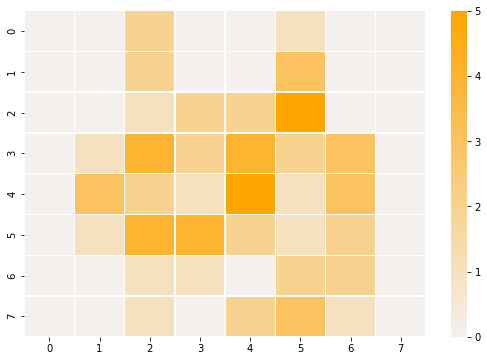

In [56]:
#
# let's build the feature-importance image!  this time for the RF!
#

pixels = IMPs*100. # we scale it up since the largest percentage is 16%
pixels = pixels.astype(int)             # conver to integers for plotting
pixels = np.reshape(pixels, (8,8))  # makes 8x8
print(f"The pixels are\n{pixels}")  

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
#my_cmap = sns.dark_palette("Gray", as_cmap=True)
my_cmap = sns.light_palette("Orange", as_cmap=True)    # all seaborn palettes: medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

# plot! Change True to False to skip the numbers...  None for reddish palette
sns.heatmap(pixels, annot=False, fmt="d", linewidths=.5, ax=ax, cmap=my_cmap)